In [345]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import random
import tkinter as tk
from PIL import Image, ImageDraw, ImageOps
from copy import deepcopy
import xgboost as xgb

In [346]:
(X_train, Y_train), (x_test_, y_test_) = tf.keras.datasets.mnist.load_data()

In [347]:
X_train = X_train.reshape(-1, 28 * 28)
x_test_ = x_test_.reshape(-1, 28 * 28)
X_train, x_test, Y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, random_state=random.randint(1, 1000))

# Для хранения новых изображений и меток
#new_samples = []
#new_labels = []

#print(len(X_train))  # Выводим новый размер X_train
#print(len(Y_train))  # Выводим новый размер Y_train, он должен быть одинаковым с X_train

#for i in range(-100, 200, 20):
#    print(i)
#    mass = X_train.copy()  # Используем .copy() для создания новой копии
#    labels = Y_train.copy()  # Копируем метки для изменения

#    for ind, string in enumerate(mass):
#        string = string.astype(np.int32)  # Преобразуем в int32 для работы с пикселями
#        string[string > 0] += i  # Добавляем значение 'i' к положительным пикселям
#        string = np.clip(string, 0, 255)  # Ограничиваем значения пикселей в диапазоне [0, 255]
#        string = string.astype(np.uint8)  # Возвращаем тип данных обратно в uint8

#        new_samples.append(string)  # Добавляем измененное изображение в новый список
#        new_labels.append(labels[ind])  # Добавляем соответствующую метку для нового изображения

# Преобразуем списки в массивы NumPy
#new_samples = np.array(new_samples)
#new_labels = np.array(new_labels)

# Объединяем новые данные с исходными
#X_train = np.concatenate((X_train, new_samples), axis=0)
#Y_train = np.concatenate((Y_train, new_labels), axis=0)

print(len(X_train))  # Выводим новый размер X_train
print(len(Y_train))  # Выводим новый размер Y_train, он должен быть одинаковым с X_train


42000
42000


In [348]:
def outputMassPixelImg(mass):
    for i in range(28):
        string = mass[i * 28: (i + 1) * 28]
        out = ''
        for sim in string:
            flag = 0
            if sim: flag = 1
            sim = str(sim)
            while len(sim) != 3:
                sim = '0' + sim
            if flag:
                print(f" \33[33m{sim}\33[0m", end = '')
            else:
                print(f" {sim}", end = '')
        print()
    print()

In [349]:
outputMassPixelImg(X_train[65])
    

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 063 253 253 149 109 110 109 109 047 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 011 175 252 252 252 252 253 252 252 232 218 217 217 134 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 011 154 215 215 221 252 253 252 252 252 253 252 252 252 120 005 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 016 108 108 108 108 108 253 252 252 252 253 035 000 000 000

In [350]:
model = RandomForestClassifier(n_estimators=100, random_state=421)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=421)

In [351]:
predict = model.predict(x_test)

In [352]:
accuracy = accuracy_score(predict, y_test)
print(accuracy)

0.9676111111111111


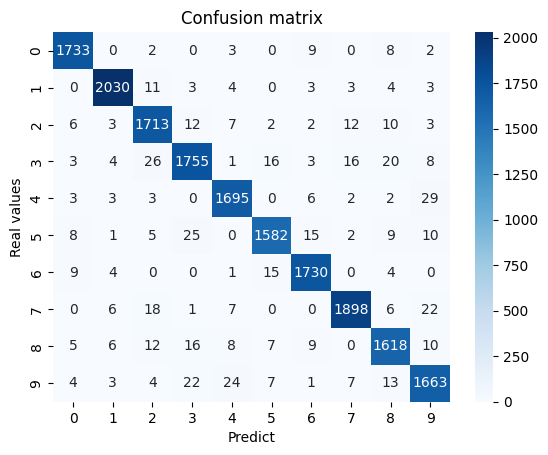

In [353]:
cm = confusion_matrix(y_test, predict)

plt.figure()
sns.heatmap(data=cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predict")
plt.ylabel("Real values")
plt.title("Confusion matrix")
plt.show()

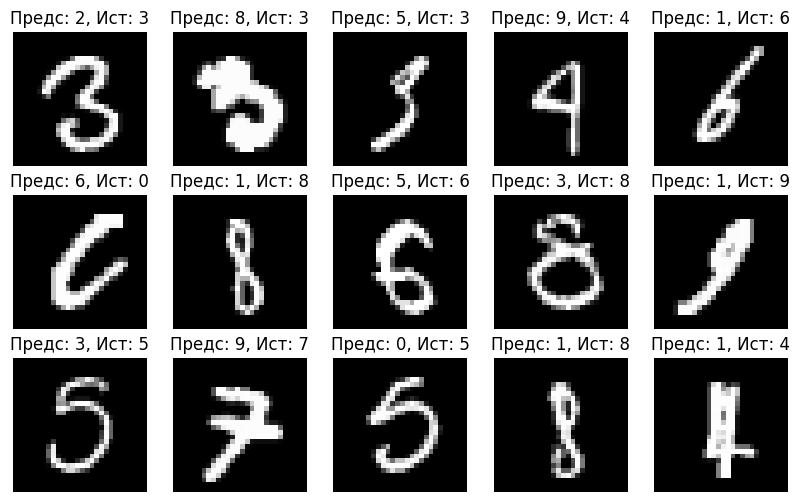

In [354]:
errors = np.where(predict != y_test)[0]
# print(errors)
fig, axes = plt.subplots(3, 5, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    if i < len(errors):
        ind = errors[i]
        ax.imshow(x_test[ind].reshape(28, 28), cmap="gray")
        ax.set_title(f"Предс: {predict[ind]}, Ист: {y_test[ind]}")
        ax.axis("off")
plt.show()
        

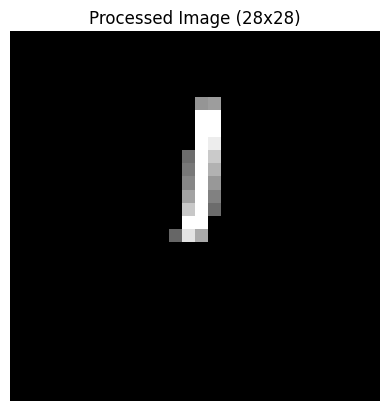

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 149 157 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 255 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 255 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 255 237 000 000 000 000 000 000 000 000

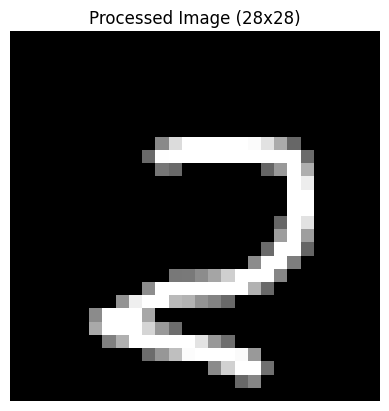

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 137 220 255 255 255 255 255 251 226 171 103 000 000

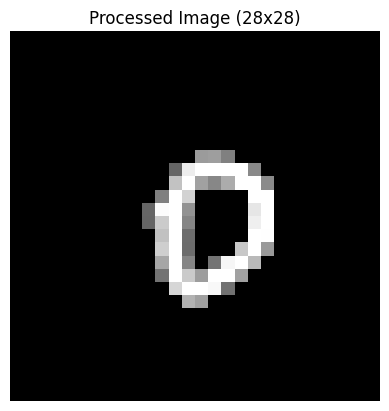

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000

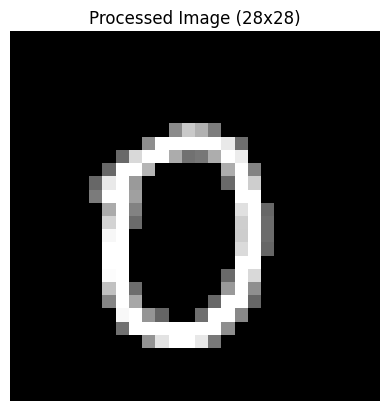

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 139 201 177 125 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 142 255 255 255 255 255 233 110 000 000 000 000 000 000

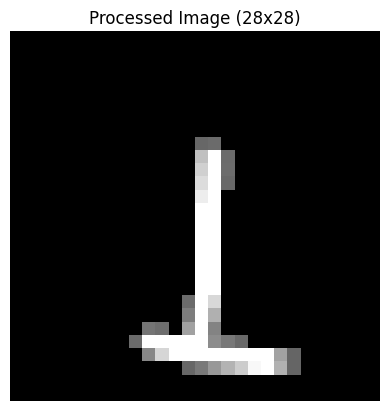

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 103 107 000 000 000 000 000 000 000 000

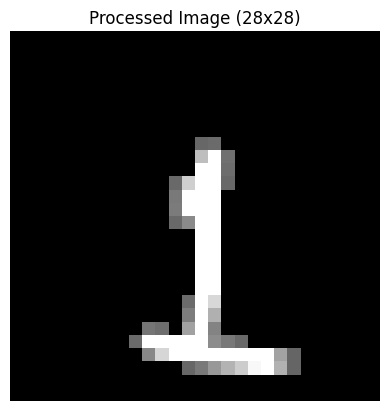

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 103 107 000 000 000 000 000 000 000 000

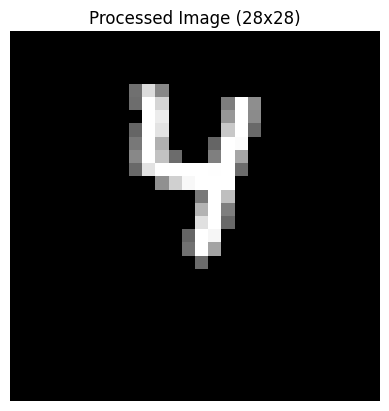

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 112 220 136 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 109 255 213 000 000 000 000 125 255 142 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 255 236 000 000 000 000 151 255 139 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 101 255 228 000 000 000 000 200 255 106 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 120 255 176 000 000 000 101 255 251 000 000 000 000 000 000

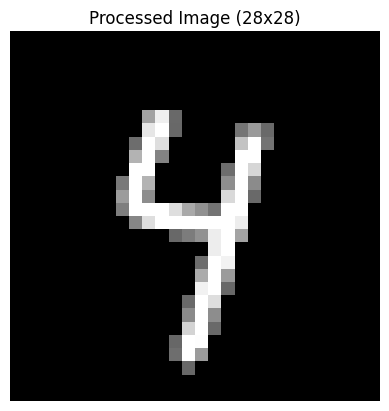

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 162 239 105 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 230 255 104 000 000 000 000 117 154 105 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 109 255 222 000 000 000 000 000 195 255 115 000 000 000 000

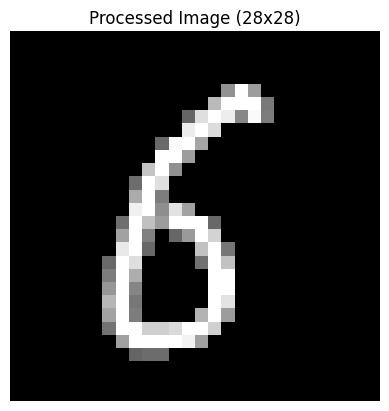

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 146 255 157 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 186 255 255 255 120 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 101 222 255 237 135 250 123 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 236 255 220 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 105 250 255 165 000 000 000 000 000 000 000 000 000

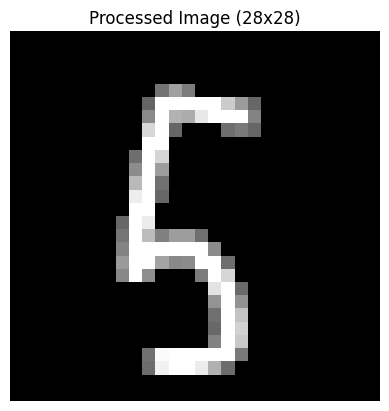

 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 000 115 160 123 000 000 000 000 000 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 101 255 255 255 255 255 203 155 102 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 138 255 178 172 232 255 255 255 132 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 215 255 102 000 000 000 110 122 102 000 000 000 000 000 000 000 000 000
 000 000 000 000 000 000 000 000 000 000 255 255 000 000 000 000 000 000 000 000 000 000 000 000

In [355]:
# Function to preprocess and predict the digit
def predict_digit(img):
    img = img.convert("L")  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to MNIST size
    img_array = np.array(img)
    img_array = img_array.astype(np.int32)  # Переводим в 32-битные числа
    img_array[img_array > 0] += 100         # Увеличиваем
    img_array = np.clip(img_array, 0, 255)  # Ограничиваем от 0 до 255
    img_array = img_array.astype(np.uint8)  # Переводим обратно в 8-битный формат



    # Show the processed image in the console (as an actual image)
    plt.imshow(img_array, cmap="gray")
    plt.title("Processed Image (28x28)")
    plt.axis("off")
    plt.show()

    img_array = img_array.reshape(1, -1)  # Flatten to (1, 784) for model input
    outputMassPixelImg(img_array[0])
    probabilities = model.predict_proba(img_array)[0]  # Get prediction probabilities
    prediction = np.argmax(probabilities)  # Get the most probable digit

    label.config(text=f"Prediction: {prediction}", font=("Arial", 20))
    prob_text = "\n".join([f"{i}: {prob*100:.2f}%" for i, prob in enumerate(probabilities)])
    label_probs.config(text=prob_text, font=("Arial", 14), justify="left")

# Functions to handle drawing
def start_draw(event):
    global last_x, last_y
    last_x, last_y = event.x, event.y

def draw(event):
    global last_x, last_y
    canvas.create_line(last_x, last_y, event.x, event.y, width=13, fill="white", capstyle=tk.ROUND)
    draw_img.line([last_x, last_y, event.x, event.y], fill="white", width=13)
    last_x, last_y = event.x, event.y

def clear_canvas():
    canvas.delete("all")
    draw_img.rectangle((0, 0, 280, 280), fill="black")
    label_probs.config(text="\n".join([f"{i}: 0.0%" for i in range(10)]))
    label.config(text="Prediction: ")

def recognize():
    predict_digit(img)

# Create GUI
root = tk.Tk()
root.title("Handwritten Digit Recognition")

frame = tk.Frame(root)
frame.pack()

canvas = tk.Canvas(frame, width=300, height=300, bg="black")  # Black background
canvas.grid(row=0, column=0, padx=10)

img = Image.new("L", (280, 280), "black")  # Black background image
draw_img = ImageDraw.Draw(img)

canvas.bind("<Button-1>", start_draw)
canvas.bind("<B1-Motion>", draw)

btn_clear = tk.Button(frame, text="Clear", command=clear_canvas)
btn_clear.grid(row=1, column=0, pady=5)

btn_recognize = tk.Button(frame, text="Recognize", command=recognize)
btn_recognize.grid(row=2, column=0, pady=5)

label_probs = tk.Label(frame, text="\n".join([f"{i}: 0.0%" for i in range(10)]), font=("Arial", 14), justify="left")
label_probs.grid(row=0, column=1, padx=20, sticky="n")

label = tk.Label(frame, text="Prediction: ", font=("Arial", 20))
label.grid(row=1, column=1, sticky="s")

root.mainloop()
